# Time Series Forecasting Practice Exercise

In this practice exercise, you will work on a time series forecasting task. The goal is to go through the entire workflow from loading the data to evaluating the model and making predictions. Follow each step carefully. The dataset is stored in the `Datasets` file with the name `Aquifer_Petrignano` the target is to predict `Depth_to_Groundwater_P24` column.

## Dataset: Aquifer Petrignano

### Dataset Overview:

- **Name**: Aquifer Petrignano
- **Description**: This dataset contains time series data related to groundwater levels, rainfall, temperature, and hydrometry in the Aquifer Petrignano region. The data is collected over multiple years, capturing various environmental measurements. It is particularly useful for modeling groundwater levels, climate analysis, and time series forecasting.
- **Time Period**: Starting from 14/03/2006
- **Frequency**: Daily observations

### Features:

1. **Date**: The date of the observation in `DD/MM/YYYY` format.
2. **Rainfall_Bastia_Umbra**: Daily rainfall measurement in the Bastia Umbra region (mm).
3. **Depth_to_Groundwater_P24**: Depth to groundwater at observation point P24 (meters).
4. **Depth_to_Groundwater_P25**: Depth to groundwater at observation point P25 (meters).
5. **Temperature_Bastia_Umbra**: Daily temperature in the Bastia Umbra region (°C).
6. **Temperature_Petrignano**: Daily temperature in the Petrignano region (°C).
7. **Volume_C10_Petrignano**: Water volume measured at station C10 in Petrignano (m³).
8. **Hydrometry_Fiume_Chiascio_Petrignano**: Hydrometry measurements of the Fiume Chiascio river in Petrignano (m).


## Load the Data

Load the time series dataset into a pandas DataFrame.

**Instructions:**
- Use `pandas` to load your dataset.
- Display the first few rows to understand its structure.
- Make sure the datetime column is correctly parsed.

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')


In [32]:
df = pd.read_csv('Aquifer_Petrignano.csv')
df.head()

,Date,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
0,28/07/2009,0.0,-28.90,-28.12,27.4,25.6,-34833.888,1.9
1,21/06/2015,0.0,-20.79,-20.45,20.8,0.0,-18681.408,0.0
2,10/10/2019,0.0,-27.36,-26.75,20.3,20.0,-28288.224,2.3
3,09/12/2011,0.0,-27.78,-26.98,9.2,8.8,-37215.072,2.0
4,20/09/2011,1.0,-26.09,-25.55,15.7,15.7,-30856.896,2.0


In [33]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.head()

,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
Date,,,,,,,
2009-07-28,0.0,-28.90,-28.12,27.4,25.6,-34833.888,1.9
2015-06-21,0.0,-20.79,-20.45,20.8,0.0,-18681.408,0.0
2019-10-10,0.0,-27.36,-26.75,20.3,20.0,-28288.224,2.3
2011-12-09,0.0,-27.78,-26.98,9.2,8.8,-37215.072,2.0
2011-09-20,1.0,-26.09,-25.55,15.7,15.7,-30856.896,2.0


In [34]:
tr_col = "Depth_to_Groundwater_P24"
series = df[tr_col]
series.head()

Date
2009-07-28   -28.90
2015-06-21   -20.79
2019-10-10   -27.36
2011-12-09   -27.78
2011-09-20   -26.09
Name: Depth_to_Groundwater_P24, dtype: float64

## Exploratory Data Analysis (EDA)

Perform exploratory data analysis on the dataset.

**Instructions:**
- Plot the time series data.
- Analyze trends, seasonality, and potential outliers.
- Plot boxplots or scatter plots to identify any outliers or anomalies in the data.
- Seasonal Decomposition: Use seasonal_decompose from the statsmodels library to break down the time series data into trend, seasonality, and residual components. Analyze each component to gain insights into the long-term movement (trend), regular patterns (seasonality), and remaining fluctuations (residuals).

Do more if needed!

In [35]:
print("Unique values before processing:")
for column in df.columns:
    print(f"{column}: {df[column].unique()}")

for column in df.columns:
    df[column] = df[column].replace('na', np.nan)

    if df[column].isnull().sum() > 0:
        most_frequent = df[column].mode()[0]
        df[column] = df[column].fillna(most_frequent)

print("\nUnique values after processing and filling missing values:")
for column in df.columns:
    print(f"{column}: {df[column].unique()}")

print("\nDataFrame after filling missing values:")
print(df)


Unique values before processing:
Rainfall_Bastia_Umbra: [ 0.   1.   0.9  0.5  nan  9.4 10.   9.8  0.1  0.2  5.8  0.6 28.2  0.4
  6.6  4.2  9.1  4.   2.8  1.3  6.2  4.4  0.8 11.6 11.2  1.4  7.6  1.7
 24.   1.2 17.8  1.6  6.5  2.  14.4 19.4  2.4  0.3  1.1  2.5 10.1 21.6
  3.1 10.6 52.6  9.  13.6 11.   3.   2.6  5.  13.2  5.1  2.7  7.   8.3
  3.4 14.3 11.8  1.9  5.4 21.2  6.9  0.7  6.   8.6  7.8  5.9  3.6 46.8
 16.3 10.4  6.1  5.5 30.  15.9  3.5 29.1  9.2 16.  33.6 11.4 15.6  3.2
  1.8 10.2 26.8 22.  18.2 15.7 39.6  4.1  5.6 15.4 43.7  3.3 14.2  8.
 14.5  7.7 19.2  9.5  5.2  8.2 12.4 12.7  3.8  2.9  3.7 22.6 23.  12.
 22.8 23.2 38.2  7.4 24.4 28.6  2.2  6.8 25.6  8.5 10.5  8.9  4.7 14.6
 10.8  8.7  4.6 25.4  4.3 21.5 16.4 12.8 21.4 15.   6.4  8.4 13.4  4.5
 13.7  5.3 40.2 39.  31.2 32.6 32.  11.3 44.6 14.8  7.2 23.6  7.1 30.9
 36.2 25.3  1.5  9.3 17.2 13.3 13.8 41.2 11.9 13.  12.5 12.2 19.  20.
  4.8 20.2  7.9  6.7 19.6 18.9 19.8 12.6 25.2 18.4 32.2 26.5 17.6 55.4
 14.7 39.4 34.6 35.7 41.

In [36]:
df .isnull().sum()

Rainfall_Bastia_Umbra                   0
Depth_to_Groundwater_P24                0
Depth_to_Groundwater_P25                0
Temperature_Bastia_Umbra                0
Temperature_Petrignano                  0
Volume_C10_Petrignano                   0
Hydrometry_Fiume_Chiascio_Petrignano    0
dtype: int64

In [37]:
df.drop_duplicates(inplace=True)

In [38]:
df.describe()

,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
count,5218.000000,5218.000000,5218.000000,5218.000000,5218.000000,5218.000000,5218.000000
mean,1.252645,-26.275797,-25.701591,14.321349,11.056037,-27969.062102,2.299770
std,4.721184,3.302899,3.202685,7.138883,8.797487,7196.941475,0.548684
min,0.000000,-34.470000,-33.710000,-3.700000,-4.200000,-45544.896000,0.000000
25%,0.000000,-28.200000,-27.590000,10.300000,2.100000,-31560.192000,2.000000
50%,0.000000,-26.045000,-25.560000,11.800000,10.700000,-28511.136000,2.300000
75%,0.000000,-23.850000,-23.450000,19.600000,18.200000,-25878.960000,2.600000
max,67.300000,-18.440000,-19.100000,33.000000,31.100000,0.000000,4.100000


In [39]:
df.dtypes

Rainfall_Bastia_Umbra                   float64
Depth_to_Groundwater_P24                float64
Depth_to_Groundwater_P25                float64
Temperature_Bastia_Umbra                float64
Temperature_Petrignano                  float64
Volume_C10_Petrignano                   float64
Hydrometry_Fiume_Chiascio_Petrignano    float64
dtype: object

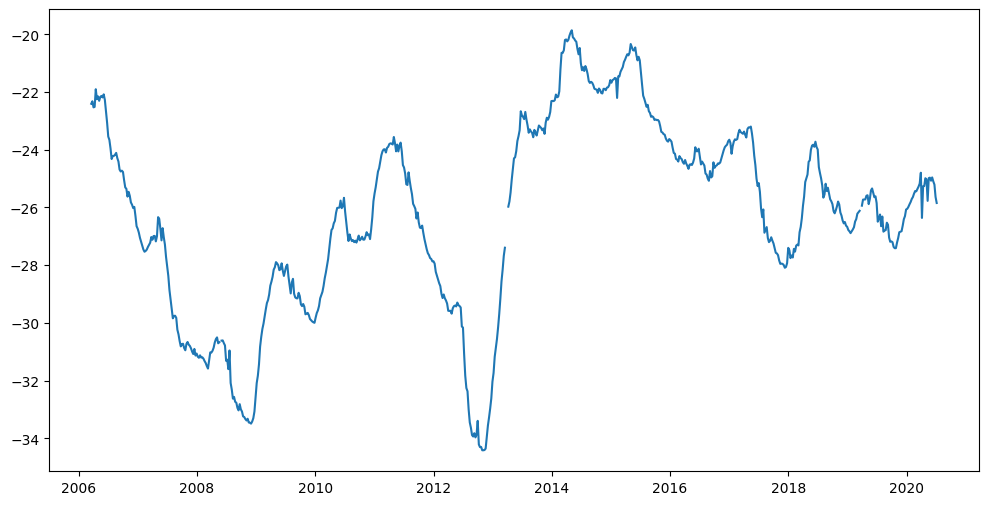

In [40]:

weekly_series = series.resample('W').mean()
plt.figure(figsize=(12, 6))
plt.plot(weekly_series)
plt.show()


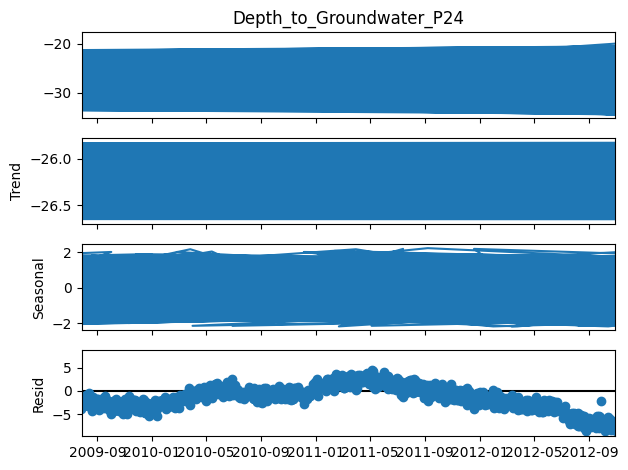

In [41]:
from statsmodels.tsa.seasonal import seasonal_decompose
series = series.dropna()
result = seasonal_decompose(series,model='additive',period=365)
result.plot()
plt.show()

## Data Preprocessing

Clean and preprocess the data.

**Instructions:**
- Handle any missing values in the dataset.
- If necessary, resample the data to ensure consistent time intervals.
- Create any additional features needed, such as lags or moving averages.
- Make sure that the dates are sorted correctly.

Do more if needed!

In [42]:
df.describe()


,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
count,5218.000000,5218.000000,5218.000000,5218.000000,5218.000000,5218.000000,5218.000000
mean,1.252645,-26.275797,-25.701591,14.321349,11.056037,-27969.062102,2.299770
std,4.721184,3.302899,3.202685,7.138883,8.797487,7196.941475,0.548684
min,0.000000,-34.470000,-33.710000,-3.700000,-4.200000,-45544.896000,0.000000
25%,0.000000,-28.200000,-27.590000,10.300000,2.100000,-31560.192000,2.000000
50%,0.000000,-26.045000,-25.560000,11.800000,10.700000,-28511.136000,2.300000
75%,0.000000,-23.850000,-23.450000,19.600000,18.200000,-25878.960000,2.600000
max,67.300000,-18.440000,-19.100000,33.000000,31.100000,0.000000,4.100000


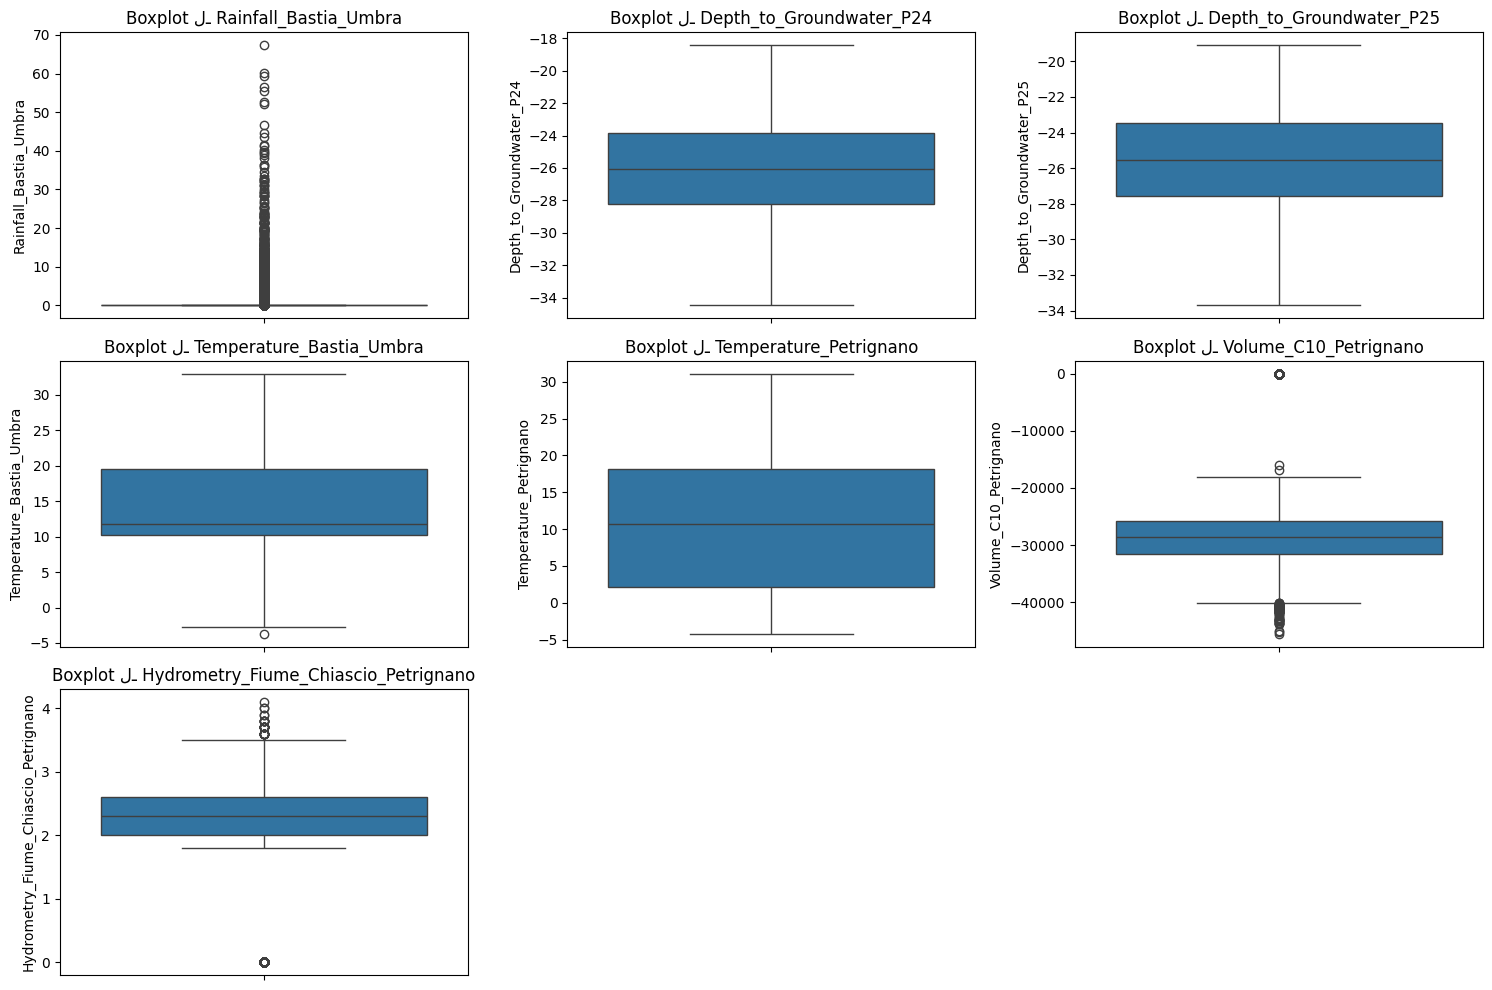

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns


numeric_columns = df.select_dtypes(include=['float', 'int']).columns


plt.figure(figsize=(15, 10))

for i, column in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns)//3 + 1, 3, i)
    sns.boxplot(y=df[column])
    plt.title(f'Boxplot لـ {column}')

plt.tight_layout()
plt.show()

In [44]:
outliers_iqr = {}

for column in numeric_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]

    outliers_iqr[column] = outliers

    print(f'Number of outliers in {column} using IQR: {len(outliers)}')

for column, outliers in outliers_iqr.items():
    if not outliers.empty:
        print(f'\nOutliers in {column} using IQR:')
        print(outliers)


Number of outliers in Rainfall_Bastia_Umbra using IQR: 1052
Number of outliers in Depth_to_Groundwater_P24 using IQR: 0
Number of outliers in Depth_to_Groundwater_P25 using IQR: 0
Number of outliers in Temperature_Bastia_Umbra using IQR: 1
Number of outliers in Temperature_Petrignano using IQR: 0
Number of outliers in Volume_C10_Petrignano using IQR: 289
Number of outliers in Hydrometry_Fiume_Chiascio_Petrignano using IQR: 184

Outliers in Rainfall_Bastia_Umbra using IQR:
Date
2011-09-20     1.0
2009-01-09     0.9
2009-07-05     0.5
2014-04-05     9.4
2014-04-13    10.0
              ... 
2016-10-08    19.2
2019-12-13     3.8
2015-09-14     0.6
2017-11-06    11.6
2017-03-07    16.6
Name: Rainfall_Bastia_Umbra, Length: 1052, dtype: float64

Outliers in Temperature_Bastia_Umbra using IQR:
Date
2018-02-27   -3.7
Name: Temperature_Bastia_Umbra, dtype: float64

Outliers in Volume_C10_Petrignano using IQR:
Date
2006-06-07        0.000
2007-05-09        0.000
2007-07-22   -43257.024
2006-05-1

## Feature Engineering

### Instructions:
  
- **Shift Method**: Use the `shift` method to create a new column `Prev_Depth_to_Groundwater_P24`, which represents the previous day's groundwater depth. This helps capture the effect of past values on current observations.

- **Date Features**: Extract meaningful time-based features from the `Date` column to enhance the model's ability to detect temporal patterns. These features include:
  - **Day of the week**: To capture weekly seasonality.
  - **Month**: To capture monthly trends.
  - **Day of the year**: Useful for modeling yearly seasonality.
  - **IsWeekend**: A binary feature that distinguishes between weekdays and weekends.
  - **Difference between Depth_to_Groundwater_P24**: Calculate the difference between consecutive values in the `Depth_to_Groundwater_P24` column to highlight short-term changes in groundwater depth.

In [45]:
df['Depth_to_Groundwater_P24'] =df['Depth_to_Groundwater_P24'].shift(1)

In [46]:

df['Day_of_week'] = df.index.dayofweek
df['month'] = df.index.month
df['day_of_year'] = df.index.dayofyear
df['IsWeekend'] = df['Day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

df['Depth_to_Groundwater_P24'] = df['Depth_to_Groundwater_P24'].diff()

df_cleaned = df.dropna(subset=['Depth_to_Groundwater_P24'])

df_cleaned.head()


,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano,Day_of_week,month,day_of_year,IsWeekend
Date,,,,,,,,,,,
2019-10-10,0.0,8.11,-26.75,20.3,20.0,-28288.224,2.3,3,10,283,0
2011-12-09,0.0,-6.57,-26.98,9.2,8.8,-37215.072,2.0,4,12,343,0
2011-09-20,1.0,-0.42,-25.55,15.7,15.7,-30856.896,2.0,1,9,263,0
2009-01-09,0.9,1.69,-30.93,4.9,4.8,-30597.696,2.3,4,1,9,0
2012-10-03,0.0,-5.71,-33.46,18.1,17.1,-32433.696,1.9,2,10,277,0


## Train-Test Split

Split the dataset into training and testing sets.

**Instructions:**
- Ensure the split maintains the time order of the data.
- Decide on an appropriate ratio for splitting the data.

In [47]:
train_size = 0.8
train_len = int(len(df) * train_size)
train_df = df.iloc[:train_len]
test_df = df.iloc[train_len:]


## Feature Scaling

Apply feature scaling to the data if needed.

**Instructions:**
- Use a scaling method such as MinMaxScaler or StandardScaler.
- Ensure scaling is applied correctly to both training and testing data.

In [48]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
train_df = sc.fit_transform(train_df)
test_df = sc.transform(test_df)



## Models Selection

Choose two models for time series forecasting.

**Instructions:**
- Select two models such as ARIMA, SARIMA, RNN, LSTM, or GRU.
- Train these models and then compare their performance.

In [49]:
from statsmodels.tsa.arima.model import ARIMA
p = 2
d = 1
q = 2
model = ARIMA(series, order=(p,d,q))
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  SARIMAX Results                                   
====================================================================================
Dep. Variable:     Depth_to_Groundwater_P24   No. Observations:                 5168
Model:                       ARIMA(2, 1, 2)   Log Likelihood              -13531.509
Date:                      Sat, 24 Aug 2024   AIC                          27073.018
Time:                              15:07:16   BIC                          27105.768
Sample:                                   0   HQIC                         27084.477
                                     - 5168                                         
Covariance Type:                        opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9778      0.015    -66.598      0.000      -1.007      -0.949
ar.L2          0.0133      0.014      0.951      0.342      -0.014       0.041
ma.L1         -0.0044      0.013     -0.345      0.730      -0.030       0.021
ma.L2         -0.9956      0.013    -77.747      0.000      -1.021      -0.970
sigma2        11.0026      0.251     43.862      0.000      10.511      11.494
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               160.47
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               1.04   Skew:                            -0.38
Prob(H) (two-sided):                  0.36   Kurtosis:                         2.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Model 1 Training

Train your first model on the training dataset.

**Instructions:**
- Fit the first model to the training data.
- Ensure to monitor the training process.

### Make 1 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

In [50]:
forecast = model_fit.forecast(steps=10)
forecast

5168   -26.526463
5169   -26.115595
5170   -26.412220
5171   -26.116706
5172   -26.409612
5173   -26.119270
5174   -26.407070
5175   -26.121790
5176   -26.404572
5177   -26.124266
Name: predicted_mean, dtype: float64

### Model 1 Evaluation

Evaluate the performance of your first model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

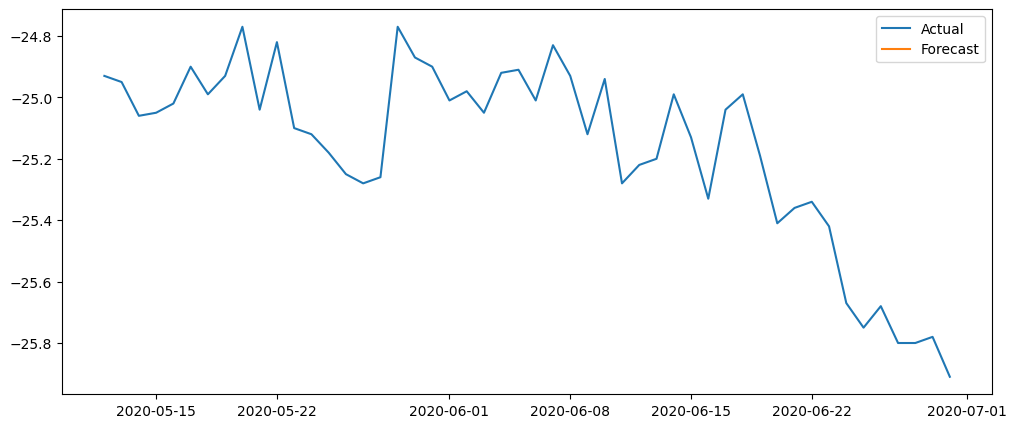

In [51]:

series = series.sort_index()

last_date = series.index[-1]
forecast_index = pd.date_range(start=last_date, periods=len(forecast) + 1, freq='D')[1:]

forecast = pd.Series(forecast, index=forecast_index)

plt.figure(figsize=(12, 5))
plt.plot(series[-50:], label='Actual')
plt.plot(forecast, label='Forecast')
plt.legend()
plt.show()


### Model 2 Training

Train your second model on the training dataset.

**Instructions:**
- Fit the second model to the training data.
- Ensure to monitor the training process.

In [52]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

Epoch 1/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1198
Epoch 2/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0442
Epoch 3/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0427
Epoch 4/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0446
Epoch 5/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0447
Epoch 6/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0446
Epoch 7/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0453
Epoch 8/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0436
Epoch 9/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0455
Epoch 10/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0443
Epoch 11/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0433
Epoch 12/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0438
Epoch 13/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0444
Epoch 14/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0441
Epoch 15/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - lo

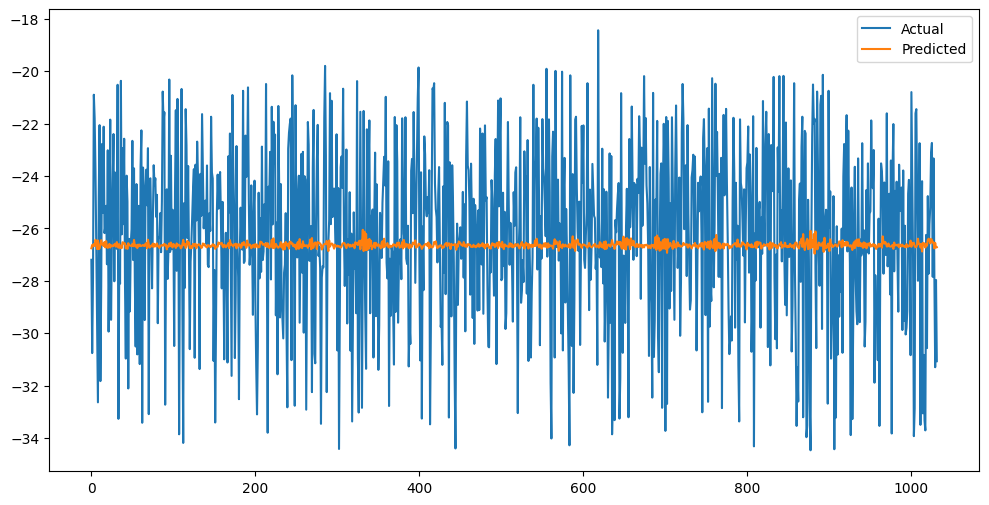

In [54]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense
import matplotlib.pyplot as plt

# تحميل البيانات
file_path = 'Aquifer_Petrignano.csv'
df = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')

# اختيار العمود الذي نريد التنبؤ به
target_column = 'Depth_to_Groundwater_P24'  # تأكد من أن هذا هو اسم العمود الصحيح في بياناتك

# إسقاط الصفوف التي تحتوي على NaN في العمود المستهدف
df = df.dropna(subset=[target_column])

# تطبيع البيانات بين 0 و 1
scaler = MinMaxScaler(feature_range=(0, 1))
df[target_column] = scaler.fit_transform(df[[target_column]])

# تحضير البيانات لتناسب نموذج RNN
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data)-time_step-1):
        X.append(data[i:(i+time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 10  # تحديد الخطوات الزمنية

data = df[target_column].values.reshape(-1, 1)
X, y = create_dataset(data, time_step)

# إعادة تشكيل البيانات لتناسب RNN
X = X.reshape(X.shape[0], X.shape[1], 1)

# تقسيم البيانات إلى تدريب واختبار
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# بناء نموذج RNN
model = Sequential()
model.add(SimpleRNN(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(SimpleRNN(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# تدريب النموذج
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# التنبؤ على بيانات الاختبار
y_pred = model.predict(X_test)

# إعادة القيم المتنبأ بها إلى النطاق الأصلي
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred = scaler.inverse_transform(y_pred)

# رسم القيم الفعلية مقابل القيم المتوقعة
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()


In [ ]:
model = Sequential()
model.add(SimpleRNN(50,return_sequences=True,input_shape=(time_step,1)))
model.add(SimpleRNN(50,return_sequences=True))
model.add(SimpleRNN(50,return_sequences=True))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 10, 50)         │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 10, 50)         │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_2 (SimpleRNN)        │ (None, 10, 50)         │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10, 1)          │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,751 (49.81 KB)

 Trainable params: 12,751 (49.81 KB)

 Non-trainable params: 0 (0.00 B)

### Make 2 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

In [ ]:
# تدريب النموذج
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)


NameError: name 'X_train' is not defined

### Model 2 Evaluation

Evaluate the performance of your second model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

## Conclusion and Interpretation

Write your conclusions based on the model's performance and the forecast.

**Instructions:**
- Interpret the results and discuss the effectiveness of your model.
- Suggest potential improvements.